In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.4.0
OS Darwin 16.7.0 x86_64 i386 64bit
pandas 0.23.0
matplotlib 2.2.2
seaborn 0.9.0
Thu Jan 03 01:05:40 2019 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'BTC'

In [5]:
def btc_block_supply_curve():
    out = [
        # Block num,
        # Total supply,
    ]
    inflation_change_blocks=210000
    inflation_change_frac=0.5
    y = 0
    block = 0
    while True:
        block += 1
        num_changes = int(
            (block - 1) / inflation_change_blocks
        )
        if num_changes > 32:
            break
        block_reward = 50 * (
            inflation_change_frac ** num_changes
        )
        if (block - 1) % inflation_change_blocks == 0:
            print(
                f'Inflation change #{num_changes}, '
                f'block reward = {block_reward}'
            )
        y += block_reward
        out.append([block, y])

    return out

In [6]:
start_date = datetime.date(2009, 1, 3)
block_time = datetime.timedelta(seconds=60 * 10)

block_supply = btc_block_supply_curve()

supply = cmb.datetime_supply_curve(
    start_date=start_date,
    block_time=block_time,
    block_supply=block_supply,
)

Inflation change #0, block reward = 50.0
Inflation change #1, block reward = 25.0
Inflation change #2, block reward = 12.5
Inflation change #3, block reward = 6.25
Inflation change #4, block reward = 3.125
Inflation change #5, block reward = 1.5625
Inflation change #6, block reward = 0.78125
Inflation change #7, block reward = 0.390625
Inflation change #8, block reward = 0.1953125
Inflation change #9, block reward = 0.09765625
Inflation change #10, block reward = 0.048828125
Inflation change #11, block reward = 0.0244140625
Inflation change #12, block reward = 0.01220703125
Inflation change #13, block reward = 0.006103515625
Inflation change #14, block reward = 0.0030517578125
Inflation change #15, block reward = 0.00152587890625
Inflation change #16, block reward = 0.000762939453125
Inflation change #17, block reward = 0.0003814697265625
Inflation change #18, block reward = 0.00019073486328125
Inflation change #19, block reward = 9.5367431640625e-05
Inflation change #20, block reward 

,block,total_supply,total_supply_pct,date
0,1,50.0,0.000238,2009-01-03 00:00:00
1,2,100.0,0.000476,2009-01-03 00:10:00
2,3,150.0,0.000714,2009-01-03 00:20:00
3,4,200.0,0.000952,2009-01-03 00:30:00
4,5,250.0,0.001190,2009-01-03 00:40:00


,block,total_supply,total_supply_pct,date
6929995,6929996,2.100000e+07,100.0,2140-10-07 23:10:00
6929996,6929997,2.100000e+07,100.0,2140-10-07 23:20:00
6929997,6929998,2.100000e+07,100.0,2140-10-07 23:30:00
6929998,6929999,2.100000e+07,100.0,2140-10-07 23:40:00
6929999,6930000,2.100000e+07,100.0,2140-10-07 23:50:00


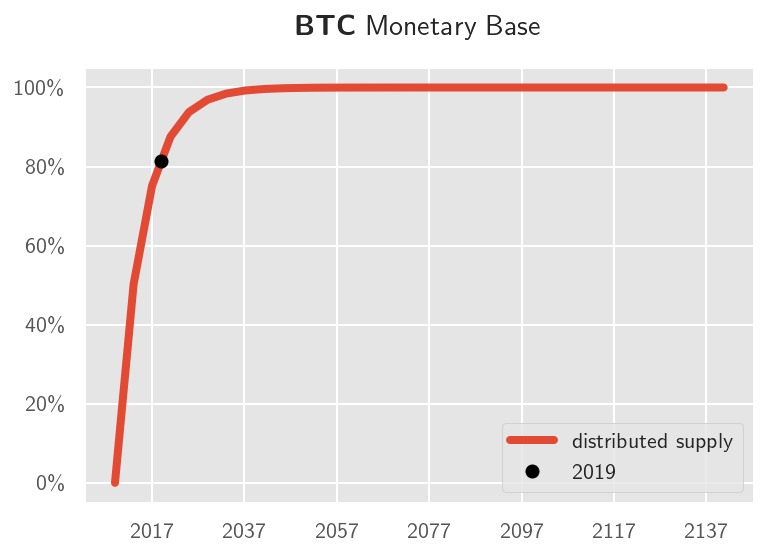

In [7]:
display(supply.head())
display(supply.tail())

cmb.plot_supply_curve(
    supply,
    'BTC',
);

## Standardize Time Series

In [8]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 6876 lines to file ../output-data/BTC_weekly.csv


,coin,block,total_supply,total_supply_pct,date
0,BTC,1,50.0,0.000238,2009-01-01
1,BTC,289,14450.0,0.068810,2009-01-01
2,BTC,1297,64850.0,0.308810,2009-01-01
3,BTC,2305,115250.0,0.548810,2009-01-01
4,BTC,3313,165650.0,0.788810,2009-01-01


,coin,block,total_supply,total_supply_pct,date
6871,BTC,6925249,2.100000e+07,100.0,2140-09-01
6872,BTC,6926257,2.100000e+07,100.0,2140-09-01
6873,BTC,6927265,2.100000e+07,100.0,2140-09-01
6874,BTC,6928273,2.100000e+07,100.0,2140-09-01
6875,BTC,6929281,2.100000e+07,100.0,2140-10-01


In [9]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 1582 lines to file ../output-data/BTC_monthly.csv


,coin,block,total_supply,total_supply_pct,date
0,BTC,1,50.0,0.000238,2009-01-01
1,BTC,4177,208850.0,0.994524,2009-02-01
2,BTC,8209,410450.0,1.954524,2009-03-01
3,BTC,12673,633650.0,3.017381,2009-04-01
4,BTC,16993,849650.0,4.045952,2009-05-01


,coin,block,total_supply,total_supply_pct,date
1577,BTC,6911425,2.100000e+07,100.0,2140-06-01
1578,BTC,6915745,2.100000e+07,100.0,2140-07-01
1579,BTC,6920209,2.100000e+07,100.0,2140-08-01
1580,BTC,6924673,2.100000e+07,100.0,2140-09-01
1581,BTC,6928993,2.100000e+07,100.0,2140-10-01


In [10]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 132 lines to file ../output-data/BTC_yearly.csv


,coin,block,total_supply,total_supply_pct,date
0,BTC,1,50.0,0.000238,2009-01-01
1,BTC,52273,2613650.0,12.445952,2010-01-01
2,BTC,104833,5241650.0,24.960238,2011-01-01
3,BTC,157393,7869650.0,37.474524,2012-01-01
4,BTC,210097,10502425.0,50.011548,2013-01-01


,coin,block,total_supply,total_supply_pct,date
127,BTC,6679153,2.100000e+07,100.0,2136-01-01
128,BTC,6731857,2.100000e+07,100.0,2137-01-01
129,BTC,6784417,2.100000e+07,100.0,2138-01-01
130,BTC,6836977,2.100000e+07,100.0,2139-01-01
131,BTC,6889537,2.100000e+07,100.0,2140-01-01
